In [335]:
import pandas as pd
import numpy as np
from pathlib import Path

**Import Data and Data Clean**

In [336]:
base = Path("/content/sample_data/data")
files = list(base.glob("*.csv"))

In [337]:
dfs = {}
for f in files:
    df = pd.read_csv(f)
    dfs[f.name] = df
    print(f"Loaded {f.name} — {df.shape[0]} rows, {df.shape[1]} columns")

Loaded Stores.csv — 7 rows, 4 columns
Loaded Products.csv — 17 rows, 4 columns
Loaded Promotions.csv — 12 rows, 5 columns
Loaded Customers.csv — 12 rows, 5 columns
Loaded BundledProductsPromotions.csv — 9 rows, 2 columns
Loaded Sales.csv — 135 rows, 6 columns
Loaded BundledProducts.csv — 9 rows, 2 columns
Loaded BundledProducts_Products.csv — 20 rows, 2 columns
Loaded Categories.csv — 5 rows, 2 columns


Check if data loaded correctly



In [338]:
dfs["Sales.csv"].head()

,OrderID,CustomerID,BundledProductID,OrderDate,SalesAmount,StoreID
0,1001.0,5001.0,3001.0,15/01/2024,150.0,101.0
1,1002.0,5002.0,3002.0,16/01/2024,200.0,102.0
2,1003.0,5003.0,3003.0,17/01/2024,300.0,101.0
3,1004.0,5001.0,3001.0,15/02/2024,100.0,103.0
4,1005.0,5002.0,3002.0,16/02/2024,250.0,101.0


In [339]:
for name, df in dfs.items():
    print(name)
    display(df.head())

Stores.csv


,StoreID,StoreName,Location,Manager
0,101,Store A,New York,Alice
1,102,Store B,Los Angeles,Bob
2,103,Store C,Chicago,Charlie
3,104,Store D,San Francisco,David
4,105,Store E,Miami,Eve


Products.csv


,ProductID,ProductName,CategoryID,Price
0,2001,Product A,100,150.0
1,2002,Product B,101,200.0
2,2003,Product C,102,300.0
3,2004,Product D,103,100.0
4,2005,Product E,104,350.0


Promotions.csv


,PromotionID,PromotionName,StartDate,EndDate,DiscountPercentage
0,4001,Promo A,2024-01-01,2024-01-31,10
1,4002,Promo B,2024-02-01,2024-02-28,15
2,4003,Promo C,2024-03-01,2024-03-31,20
3,4004,Promo D,2024-04-01,2024-04-30,25
4,4005,Promo E,2024-05-01,2024-05-31,30


Customers.csv


,CustomerID,Name,Age,Gender,City
0,5001,John Doe,28.0,M,New York
1,5002,Jane Smith,34.0,F,Los Angeles
2,5003,Jim Brown,45.0,M,Chicago
3,5004,Susan Green,23.0,F,San Francisco
4,5005,Tom White,39.0,M,Miami


BundledProductsPromotions.csv


,BundledProductID,PromotionID
0,3001,4001
1,3002,4002
2,3003,4003
3,3004,4004
4,3005,4005


Sales.csv


,OrderID,CustomerID,BundledProductID,OrderDate,SalesAmount,StoreID
0,1001.0,5001.0,3001.0,15/01/2024,150.0,101.0
1,1002.0,5002.0,3002.0,16/01/2024,200.0,102.0
2,1003.0,5003.0,3003.0,17/01/2024,300.0,101.0
3,1004.0,5001.0,3001.0,15/02/2024,100.0,103.0
4,1005.0,5002.0,3002.0,16/02/2024,250.0,101.0


BundledProducts.csv


,BundledProductID,BundledProductName
0,3001,Bundle A
1,3002,Bundle B
2,3003,Bundle C
3,3004,Bundle D
4,3005,Bundle E


BundledProducts_Products.csv


,BundledProductID,ProductID
0,3001,2001
1,3001,2002
2,3001,2003
3,3002,2004
4,3002,2005


Categories.csv


,CategoryID,CategoryName
0,100,Electronics
1,101,Clothing
2,102,Home & Kitchen
3,103,Sports
4,104,Books


Data Profilling Summary



In [340]:

summary = []

for name, df in dfs.items():
    # basic info
    total_rows = len(df)
    total_cols = len(df.columns)
    total_cells = total_rows * total_cols

    # missing values
    missing_cells = df.isna().sum().sum()
    missing_pct_cells = round((missing_cells / total_cells) * 100, 2)
    missing_pct_rows = round(df.isna().any(axis=1).mean() * 100, 2)

    # duplicates
    dup_count = df.duplicated().sum()
    dup_pct = round((dup_count / total_rows) * 100, 2) if total_rows > 0 else 0

    summary.append({
        "Dataset": name,
        "Rows": total_rows,
        "Columns": total_cols,
        "Missing Cells %": missing_pct_cells,
        "Rows w/ Missing %": missing_pct_rows,
        "Duplicates": dup_count,
        "Duplicates %": dup_pct
    })

summary_df = pd.DataFrame(summary)
summary_df


,Dataset,Rows,Columns,Missing Cells %,Rows w/ Missing %,Duplicates,Duplicates %
0,Stores.csv,7,4,0.00,0.00,0,0.00
1,Products.csv,17,4,1.47,5.88,1,5.88
2,Promotions.csv,12,5,0.00,0.00,0,0.00
3,Customers.csv,12,5,3.33,16.67,1,8.33
4,BundledProductsPromotions.csv,9,2,0.00,0.00,0,0.00
5,Sales.csv,135,6,3.70,11.85,5,3.70
6,BundledProducts.csv,9,2,0.00,0.00,0,0.00
7,BundledProducts_Products.csv,20,2,0.00,0.00,0,0.00
8,Categories.csv,5,2,0.00,0.00,0,0.00


  Obseravation:
  - Duplicates need to be deduplicated
  - Missing values for [Sales], [Products] and [Customers] need to be handled, considering the missing percentage is relatively small, we can either safely drop some rows, or handle numeric with median, category with 'unknown'etc. however if the primary key is missing we need to handle them specifically. If foreign keys are missing we need to investigate and think about an approach
  - For outliers we can have better visualization in PBI later on

Data Clean

In [341]:
cleaned_dfs = {}

In [342]:
for name, df in dfs.items():
    #Trim whitespaces
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    #Standardise the nulls before removing null values
    df = df.replace(["", " ", "None", "NULL", "null", "N/A", "na", "-", "--"], np.nan)

    # Deduplicate
    df = df.drop_duplicates()

    #If all columns are missing for one row, safe to drop
    all_null_before = df.isna().all(axis=1).sum()
    df = df.dropna(how="all")

    cleaned_dfs[name] = df



/tmp/ipython-input-2832348431.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-2832348431.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-2832348431.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


**Define and validate primary keys**

For table [BundledProducts_Products], bundledproductid and productid is many to many relationship, we can create a surrogate key for this table

For table [BundledProductsPromotions], the relationship between bundledproductid and promotionid looks like 1:1 however from business perspective many to many relationship makes more sense, we will also create a surrogate key for this table

In [343]:

bp = cleaned_dfs["BundledProducts_Products.csv"].copy()

# keep only unique pairs, then assign a bridge PK
# Used the auto-increment integers as surrogate key
pair_cols = ["BundledProductID", "ProductID"]
bp = bp.drop_duplicates(subset=pair_cols).reset_index(drop=True)
bp.insert(0, "BP_Prod_BridgeID", range(1, len(bp) + 1))

cleaned_dfs["BundledProducts_Products.csv"] = bp

# BundledProductsPromotions bridge
bpp = cleaned_dfs["BundledProductsPromotions.csv"].copy()

pair_cols2 = ["BundledProductID", "PromotionID"]
bpp = bpp.drop_duplicates(subset=pair_cols2).reset_index(drop=True)
bpp.insert(0, "BP_Promo_BridgeID", range(1, len(bpp) + 1))

cleaned_dfs["BundledProductsPromotions.csv"] = bpp


In [344]:
primary_keys = {
    "Products.csv": ["ProductID"],
    "BundledProducts.csv": ["BundledProductID"],
    "Promotions.csv": ["PromotionID"],
    "Customers.csv": ["CustomerID"],
    "Stores.csv": ["StoreID"],
    "Categories.csv": ["CategoryID"],
    "BundledProducts_Products.csv": ["BP_Prod_BridgeID"],
    "BundledProductsPromotions.csv": ["BP_Promo_BridgeID"],
    "Sales.csv": ["OrderID"]
}


pk_results = []
for name, df in cleaned_dfs.items():
    pks = primary_keys.get(name, [])
    if not pks:
        pk_results.append({"Dataset": name, "PK": "None defined", "Missing PK values": "N/A", "Duplicate PKs": "N/A"})
        continue

    missing_cols = [c for c in pks if c not in df.columns]
    if missing_cols:
        pk_results.append({"Dataset": name, "PK": f"Missing columns: {missing_cols}", "Missing PK values": "N/A", "Duplicate PKs": "N/A"})
        continue

    miss_rows = int(df[pks].isna().any(axis=1).sum())
    dup_rows  = int(df.duplicated(subset=pks).sum())
    pk_results.append({"Dataset": name, "PK": ", ".join(pks), "Missing PK values": miss_rows, "Duplicate PKs": dup_rows})

pd.DataFrame(pk_results)


,Dataset,PK,Missing PK values,Duplicate PKs
0,Stores.csv,StoreID,0,0
1,Products.csv,ProductID,0,0
2,Promotions.csv,PromotionID,0,0
3,Customers.csv,CustomerID,0,0
4,BundledProductsPromotions.csv,BP_Promo_BridgeID,0,0
5,Sales.csv,OrderID,0,0
6,BundledProducts.csv,BundledProductID,0,0
7,BundledProducts_Products.csv,BP_Prod_BridgeID,0,0
8,Categories.csv,CategoryID,0,0


Primary keys are all clean, then we need to check the foreign keys and missing values. By observation on the dataset, [Sales] table is the only one we need to handle specifically

In [345]:
sales = cleaned_dfs["Sales.csv"]

# Foreign keys in Sales
key_columns = [ "CustomerID", "StoreID", "BundledProductID"]

null_summary = []

for col in key_columns:
    null_count = int(sales[col].isna().sum())
    total = len(sales)
    pct = round((null_count / total) * 100, 2)
    null_summary.append({
        "Column": col,
        "Missing Count": null_count,
        "Missing %": pct
    })

missing_df = pd.DataFrame(null_summary)
display(missing_df)


,Column,Missing Count,Missing %
0,CustomerID,8,6.2
1,StoreID,0,0.0
2,BundledProductID,0,0.0


CustomerID in [Sales] have 8 null values, we can assign these as CustomerID = -1 and add CustomerID = -1 in [Customers] dimention table and capture it as 'Unknow' category, so we have a clear explanation on this and PBI will still join successfully on these rows

In [346]:
# Replace missing CustomerID in Sales with -1
sales["CustomerID"] = sales["CustomerID"].fillna(-1)

In [347]:
customers = cleaned_dfs["Customers.csv"]
if -1 not in customers["CustomerID"].values:
    unknown_row = {
        "CustomerID": -1,
        "Name": "Unknown Customer"
    }
    customers = pd.concat([customers, pd.DataFrame([unknown_row])], ignore_index=True)

cleaned_dfs["Sales.csv"] = sales
cleaned_dfs["Customers.csv"] = customers

In [348]:
#Copy and run the data profilling on cleaned_dfs again
summary = []

for name, df in cleaned_dfs.items():
    # basic info
    total_rows = len(df)
    total_cols = len(df.columns)
    total_cells = total_rows * total_cols

    # missing values
    missing_cells = df.isna().sum().sum()
    missing_pct_cells = round((missing_cells / total_cells) * 100, 2)
    missing_pct_rows = round(df.isna().any(axis=1).mean() * 100, 2)

    # duplicates
    dup_count = df.duplicated().sum()
    dup_pct = round((dup_count / total_rows) * 100, 2) if total_rows > 0 else 0

    summary.append({
        "Dataset": name,
        "Rows": total_rows,
        "Columns": total_cols,
        "Missing Cells %": missing_pct_cells,
        "Rows w/ Missing %": missing_pct_rows,
        "Duplicates": dup_count,
        "Duplicates %": dup_pct
    })

summary_df = pd.DataFrame(summary)
summary_df

,Dataset,Rows,Columns,Missing Cells %,Rows w/ Missing %,Duplicates,Duplicates %
0,Stores.csv,7,4,0.00,0.00,0,0.0
1,Products.csv,16,4,1.56,6.25,0,0.0
2,Promotions.csv,12,5,0.00,0.00,0,0.0
3,Customers.csv,12,5,8.33,25.00,0,0.0
4,BundledProductsPromotions.csv,9,3,0.00,0.00,0,0.0
5,Sales.csv,129,6,1.29,7.75,0,0.0
6,BundledProducts.csv,9,2,0.00,0.00,0,0.0
7,BundledProducts_Products.csv,20,3,0.00,0.00,0,0.0
8,Categories.csv,5,2,0.00,0.00,0,0.0


**Create the aggregated table and enable analysis**

In [349]:
sales      = cleaned_dfs["Sales.csv"].copy()
bpp        = cleaned_dfs["BundledProducts_Products.csv"].copy()      # BundledProductID ProductID
bprom      = cleaned_dfs["BundledProductsPromotions.csv"].copy()     # BundledProductID PromotionID
products   = cleaned_dfs["Products.csv"].copy()
categories = cleaned_dfs["Categories.csv"].copy()
bundles    = cleaned_dfs["BundledProducts.csv"].copy()
promos     = cleaned_dfs["Promotions.csv"].copy()
stores     = cleaned_dfs["Stores.csv"].copy()
customers  = cleaned_dfs["Customers.csv"].copy()

In [350]:
# Convert date
sales["OrderDate"] = pd.to_datetime(sales["OrderDate"], errors="coerce")
sales["YearMonth"]   = sales["OrderDate"].dt.to_period("M").astype(str)
sales["YearQuarter"] = sales["OrderDate"].dt.to_period("Q").astype(str)
promos["StartDate"] = pd.to_datetime(promos["StartDate"], dayfirst=True, errors="coerce")
promos["EndDate"]   = pd.to_datetime(promos["EndDate"],   dayfirst=True, errors="coerce")

sales.head()

/tmp/ipython-input-3416783931.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales["OrderDate"] = pd.to_datetime(sales["OrderDate"], errors="coerce")
/tmp/ipython-input-3416783931.py:6: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  promos["EndDate"]   = pd.to_datetime(promos["EndDate"],   dayfirst=True, errors="coerce")


,OrderID,CustomerID,BundledProductID,OrderDate,SalesAmount,StoreID,YearMonth,YearQuarter
0,1001.0,5001.0,3001.0,2024-01-15,150.0,101.0,2024-01,2024Q1
1,1002.0,5002.0,3002.0,2024-01-16,200.0,102.0,2024-01,2024Q1
2,1003.0,5003.0,3003.0,2024-01-17,300.0,101.0,2024-01,2024Q1
3,1004.0,5001.0,3001.0,2024-02-15,100.0,103.0,2024-02,2024Q1
4,1005.0,5002.0,3002.0,2024-02-16,250.0,101.0,2024-02,2024Q1


In [351]:
# link bundles to products
# Bridge table: BundledProducts_Products (BundleID:ProductID)
sales = sales.merge(bpp, how="left", left_on="BundledProductID", right_on="BundledProductID")

In [352]:
sales = sales.merge(products, how="left", on="ProductID")

In [353]:
sales = sales.merge(categories, how="left", on="CategoryID")

In [354]:
# Join Promotion and apply discount only if order is within promo dates
sales = sales.merge(bprom[["BundledProductID", "PromotionID"]], how="left", on="BundledProductID")
sales = sales.merge(
    promos[["PromotionID", "PromotionName", "StartDate", "EndDate", "DiscountPercentage"]],
    how="left",
    on="PromotionID"
)

in_window = (
    sales["PromotionID"].notna()
    & sales["OrderDate"].notna()
    & sales["StartDate"].notna()
    & sales["EndDate"].notna()
    & sales["OrderDate"].between(sales["StartDate"], sales["EndDate"], inclusive="both")
)

# Convert WHERE OrderDate BETWEEN StartDate AND EndDate
sales.loc[~in_window, ["PromotionID", "PromotionName", "DiscountPercentage"]] = np.nan

sales["SalesAmount"] = pd.to_numeric(sales["SalesAmount"], errors="coerce")
sales["EffectiveDiscountPct"] = sales["DiscountPercentage"].astype(float).fillna(0.0)
sales["DiscountAmount"] = (sales["SalesAmount"] * sales["EffectiveDiscountPct"] / 100.0).fillna(0.0)
sales["NetSales"] = sales["SalesAmount"] - sales["DiscountAmount"]
sales["HasPromotion"] = np.where(in_window, True, False) #create a flag column



In [355]:
sales = sales.merge(bundles, how="left", on="BundledProductID")
sales = sales.merge(stores, how="left", on="StoreID")
sales = sales.merge(customers, how="left", on="CustomerID")

In [356]:
sales.columns

Index(['OrderID', 'CustomerID', 'BundledProductID', 'OrderDate', 'SalesAmount',
       'StoreID', 'YearMonth', 'YearQuarter', 'BP_Prod_BridgeID', 'ProductID',
       'ProductName', 'CategoryID', 'Price', 'CategoryName', 'PromotionID',
       'PromotionName', 'StartDate', 'EndDate', 'DiscountPercentage',
       'EffectiveDiscountPct', 'DiscountAmount', 'NetSales', 'HasPromotion',
       'BundledProductName', 'StoreName', 'Location', 'Manager', 'Name', 'Age',
       'Gender', 'City'],
      dtype='object')

Group by Columns

In [357]:
group_cols = [
    "YearMonth", "YearQuarter",
    "ProductID", "ProductName", "CategoryName",
    "BundledProductID", "BundledProductName",
    "PromotionID", "PromotionName", "StartDate", "EndDate", "HasPromotion",
    "StoreID", "StoreName", "Location", "Manager",
    "CustomerID", "Name", "Age", "Gender", "City"
]


Aggregated values
In the data clean section, I left the null numeric untouched because the nulls in sales are most likely to be incomplete records, however we do need to consider to convert this column to numeric in case there are non-numeric messing up with the aggregation calcs but still leaves NULLS untouched

In [358]:
agg_df = sales.copy()
agg_df["SalesAmount"] = pd.to_numeric(agg_df["SalesAmount"], errors="coerce") #convert non-numeric values to NaN

In [359]:


sales_agg = (
    sales
    .groupby(group_cols, dropna=False)
    .agg(
        OrderCount = ("OrderID", "nunique"),
        GrossSales = ("SalesAmount", "sum"),
        Discount   = ("DiscountAmount", "sum"),
        NetSales   = ("NetSales", "sum"),
    )
    .reset_index()
)


In [360]:
sales_agg.head()

,YearMonth,YearQuarter,ProductID,ProductName,CategoryName,BundledProductID,BundledProductName,PromotionID,PromotionName,StartDate,...,Manager,CustomerID,Name,Age,Gender,City,OrderCount,GrossSales,Discount,NetSales
0,2024-01,2024Q1,2001,Product A,Electronics,3001.0,Bundle A,4001.0,Promo A,2024-01-01,...,Alice,5001.0,John Doe,28.0,M,New York,1,150.0,15.0,135.0
1,2024-01,2024Q1,2002,Product B,Clothing,3001.0,Bundle A,4001.0,Promo A,2024-01-01,...,Alice,5001.0,John Doe,28.0,M,New York,1,150.0,15.0,135.0
2,2024-01,2024Q1,2003,Product C,Home & Kitchen,3001.0,Bundle A,4001.0,Promo A,2024-01-01,...,Alice,5001.0,John Doe,28.0,M,New York,1,150.0,15.0,135.0
3,2024-01,2024Q1,2004,Product D,Sports,3002.0,Bundle B,4002.0,Promo B,2024-01-02,...,Bob,5002.0,Jane Smith,34.0,F,Los Angeles,1,200.0,30.0,170.0
4,2024-01,2024Q1,2005,Product E,Books,3002.0,Bundle B,4002.0,Promo B,2024-01-02,...,Bob,5002.0,Jane Smith,34.0,F,Los Angeles,1,200.0,30.0,170.0


Make sure sales_agg does not have duplicates

In [361]:

key_cols = [
    "YearMonth", "YearQuarter",
    "ProductID",
    "BundledProductID",
    "PromotionID",
    "StoreID",
    "CustomerID",
]
# check for duplicates
dup_mask = sales_agg.duplicated(keep=False)

# display duplicates if any
duplicates = sales_agg[dup_mask]
print(f"Found {duplicates.shape[0]} duplicate rows.")
duplicates.head()


Found 0 duplicate rows.


,YearMonth,YearQuarter,ProductID,ProductName,CategoryName,BundledProductID,BundledProductName,PromotionID,PromotionName,StartDate,...,Manager,CustomerID,Name,Age,Gender,City,OrderCount,GrossSales,Discount,NetSales


Define a PK for sales_agg to prevent accidental duplicates later

In [362]:
sales_agg["sales_agg_id"] = sales_agg.reset_index().index + 1


**Visualization & Analysis**

In [363]:
import matplotlib.pyplot as plt


Total Sales by Product

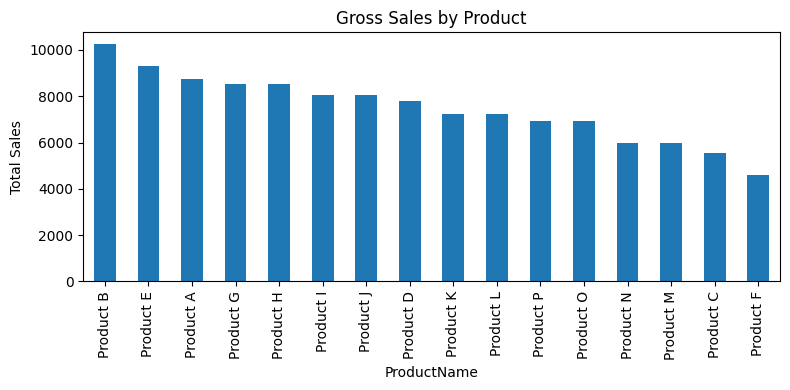

In [364]:
prod_sales = (
    sales_agg.groupby(["ProductName"], dropna=False)["GrossSales"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
prod_sales.plot(kind="bar", title="Gross Sales by Product", ylabel="Total Sales")
plt.tight_layout()
plt.show()

Total sales by bundle


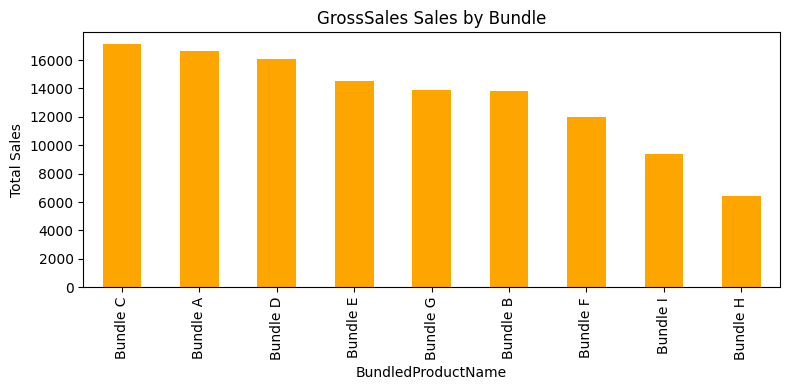

In [365]:
bundle_sales = (
    sales_agg.groupby(["BundledProductName"], dropna=False)["GrossSales"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
bundle_sales.plot(kind="bar", color="orange", title="GrossSales Sales by Bundle", ylabel="Total Sales")
plt.tight_layout()
plt.show()

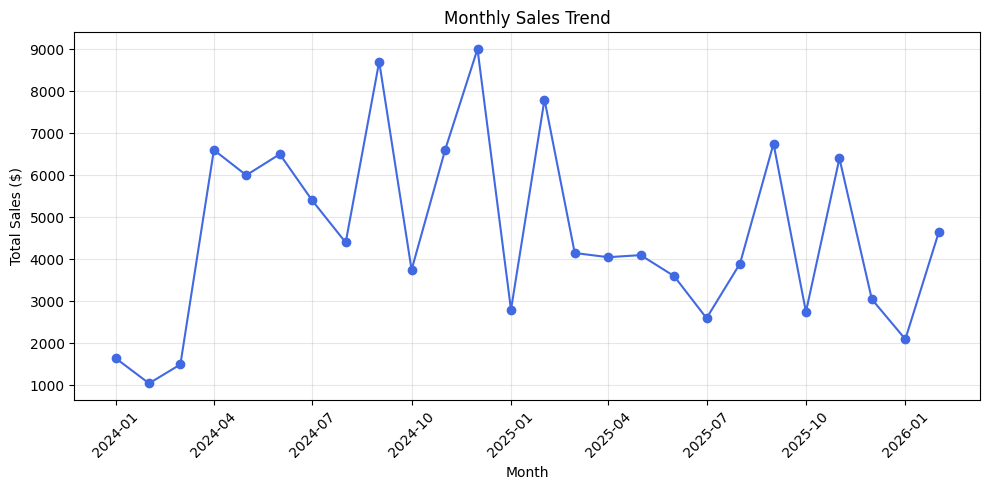

In [366]:

monthly_sales = (
    sales_agg.groupby("YearMonth")["GrossSales"]
    .sum()
    .reset_index()
)

monthly_sales["YearMonth"] = pd.to_datetime(monthly_sales["YearMonth"], format="%Y-%m")

monthly_sales = monthly_sales.sort_values("YearMonth")

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["YearMonth"], monthly_sales["GrossSales"], marker="o", color="royalblue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Promotion: NetSales without promotion vs with promotion

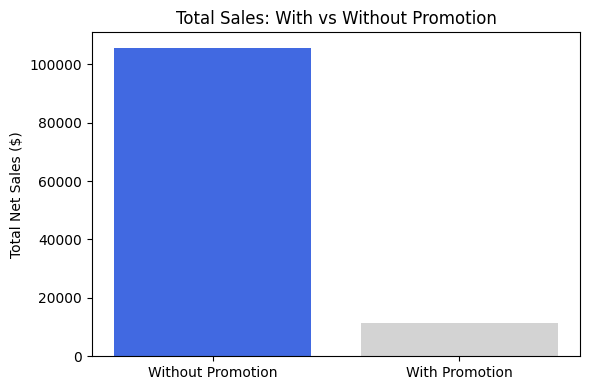

,HasPromotion,NetSales,PromoLabel
0,False,105650.0,Without Promotion
1,True,11367.5,With Promotion


In [374]:
promo_summary = (
    sales.groupby("HasPromotion", dropna=False)["NetSales"]
    .sum()
    .reset_index()
)

promo_summary["PromoLabel"] = promo_summary["HasPromotion"].map({True: "With Promotion", False: "Without Promotion"})

# Plot
plt.figure(figsize=(6, 4))
plt.bar(promo_summary["PromoLabel"], promo_summary["NetSales"], color=["royalblue", "lightgray"])
plt.title("Total Sales: With vs Without Promotion")
plt.ylabel("Total Net Sales ($)")
plt.tight_layout()
plt.show()

promo_summary

The higher sales on 'without promotion' could be because number of orders are higher without promotions - do a comprehensive summary on promotion matrix

In [376]:
# Aggregate by promotion status
promo_impact = (
    sales.groupby("HasPromotion")
    .agg(
        Orders=("OrderID", "nunique"),
        TotalSales=("NetSales", "sum")
    )
    .reset_index()
)

# Calculate average order value (AOV)
promo_impact["AvgSalesPerOrder"] = promo_impact["TotalSales"] / promo_impact["Orders"]

# Label categories nicely
promo_impact["PromoLabel"] = promo_impact["HasPromotion"].map({True: "With Promotion", False: "Without Promotion"})

promo_impact


,HasPromotion,Orders,TotalSales,AvgSalesPerOrder,PromoLabel
0,False,113,105650.0,934.955752,Without Promotion
1,True,16,11367.5,710.468750,With Promotion


This shows 'with promotion' average sales per order is actually lower, meaning promotion might not be impactful

Output Data

In [370]:
import os
import zipfile
from google.colab import files

sales_agg.to_csv("sales_agg.csv", index=False)

In [371]:
import os
import zipfile
from google.colab import files

output_folder = "cleaned_data"
os.makedirs(output_folder, exist_ok=True)

for name, df in cleaned_dfs.items():
    file_path = os.path.join(output_folder, name)
    df.to_csv(file_path, index=False)
    print(f"Saved: {file_path}")

zip_filename = "cleaned_data.zip"
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files_in_dir in os.walk(output_folder):
        for file in files_in_dir:
            zipf.write(os.path.join(root, file), arcname=file)

files.download(zip_filename)

Saved: cleaned_data/Stores.csv
Saved: cleaned_data/Products.csv
Saved: cleaned_data/Promotions.csv
Saved: cleaned_data/Customers.csv
Saved: cleaned_data/BundledProductsPromotions.csv
Saved: cleaned_data/Sales.csv
Saved: cleaned_data/BundledProducts.csv
Saved: cleaned_data/BundledProducts_Products.csv
Saved: cleaned_data/Categories.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>